In [1]:
from google.colab import files
file = files.upload()

Saving letter-recognition.csv to letter-recognition.csv


In [2]:
# Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the datas
data = pd.read_csv('letter-recognition.csv')
data.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [5]:
# Checking for null values
print(data.isnull().sum())

# Checking for duplicate values
print(data.duplicated().sum())

# Checking for unique values
print(data.nunique())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64
1332
letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64


In [6]:
data.shape

(20000, 17)

In [13]:
# Variable declaration

accuracy_list = []
parameters_list = []

for i in range(10):
    
    # Feature Scaling
    sc = StandardScaler()
    # Splitting the dataset into the Training set and Test set
    print('Sample: ', i+1)
    data_s = data.sample(frac=0.2)
    X = data_s.iloc[:,1:].values
    y = data_s.iloc[:,0].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Fitting SVM to the Training set and optimizing the hyperparameters using GridSearchCV with cross validation

    parameters = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.1, 0.01, 0.001, 0.0001]
    }

    grid = GridSearchCV(SVC(), parameters, refit = True, verbose = 10, cv = 4)
    grid.fit(X_train, y_train)

    # Predicting the Best parameters
    print('Best Parameters: ', grid.best_params_)
    parameters_list.append(grid.best_params_)

    # training the model with the best parameters

    classifier = SVC(kernel = grid.best_params_['kernel'], C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
    classifier.fit(X_train, y_train)

    accuracy = classifier.score(X_test, y_test)
    print('Accuracy: ', accuracy)
    accuracy_list.append(accuracy)

Streaming output truncated to the last 5000 lines.
[CV 4/4; 20/64] START C=1, gamma=0.1, kernel=sigmoid............................
[CV 4/4; 20/64] END C=1, gamma=0.1, kernel=sigmoid;, score=0.396 total time=   0.4s
[CV 1/4; 21/64] START C=1, gamma=0.01, kernel=linear............................
[CV 1/4; 21/64] END C=1, gamma=0.01, kernel=linear;, score=0.814 total time=   0.2s
[CV 2/4; 21/64] START C=1, gamma=0.01, kernel=linear............................
[CV 2/4; 21/64] END C=1, gamma=0.01, kernel=linear;, score=0.826 total time=   0.2s
[CV 3/4; 21/64] START C=1, gamma=0.01, kernel=linear............................
[CV 3/4; 21/64] END C=1, gamma=0.01, kernel=linear;, score=0.806 total time=   0.2s
[CV 4/4; 21/64] START C=1, gamma=0.01, kernel=linear............................
[CV 4/4; 21/64] END C=1, gamma=0.01, kernel=linear;, score=0.820 total time=   0.2s
[CV 1/4; 22/64] START C=1, gamma=0.01, kernel=poly..............................
[CV 1/4; 22/64] END C=1, gamma=0.01, kernel

In [14]:
result = pd.DataFrame( data = [ accuracy_list, parameters_list ], index = ['Best Accuracy', 'Best SVM Parameters']) 
result

,0,1,2,3,4,5,6,7,8,9
Best Accuracy,0.910833,0.905,0.9075,0.909167,0.915833,0.900833,0.901667,0.9075,0.903333,0.905
Best SVM Parameters,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"


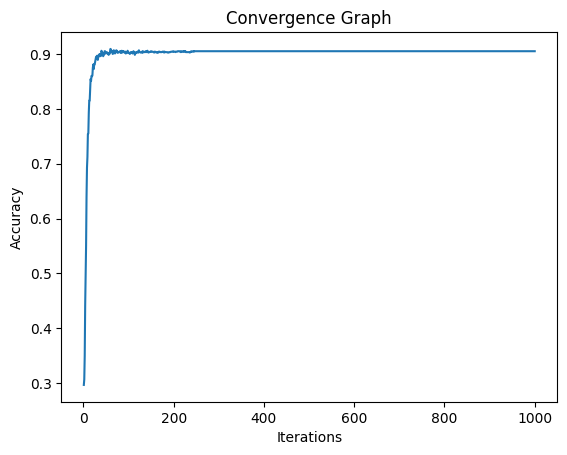

In [15]:
sample_max_accuracy = accuracy_list.index(max(accuracy_list))
sample_max_accuracy

# Plotting the convergence graph for the sample whose accuracy is maximum

classifier = SVC(kernel = parameters_list[sample_max_accuracy]['kernel'], C = parameters_list[sample_max_accuracy]['C'], gamma = parameters_list[sample_max_accuracy]['gamma'])
classifier.fit(X_train, y_train)

iterations = list()
accuracy = list()

for i in range(1, 1001):
    classifier = SVC(kernel = parameters_list[sample_max_accuracy]['kernel'], C = parameters_list[sample_max_accuracy]['C'], gamma = parameters_list[sample_max_accuracy]['gamma'], max_iter = i)
    classifier.fit(X_train, y_train)
    iterations.append(i)
    accuracy.append(classifier.score(X_test, y_test))

plt.plot(iterations, accuracy)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.show()

In [16]:
sample_max_accuracy

4

In [17]:
print('Best one Accuracy: ', accuracy_list[sample_max_accuracy])
print('Best one Parameters: ', parameters_list[sample_max_accuracy])

Best one Accuracy:  0.9158333333333334
Best one Parameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
